<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombres:** Aguirre Orozco Miguel y Alvarado Garnica Luis

**Fecha:** 

**Expediente** : 
    
**Profesor:** Oscar David Jaramillo Zuluaga.

# Proyecto Módulo 2


# <span style="color:red"> MORTALIDAD POR INSUFICIENCIA CARDIACA

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte a nivel mundial , cobrando aproximadamente 17,9 millones de vidas cada año , lo que representa el 31% de todas las muertes en todo el mundo .

La mayoría de las enfermedades cardiovasculares se pueden prevenir abordando los factores de riesgo conductuales como el consumo de tabaco, la dieta poco saludable y la obesidad, la inactividad física y el consumo nocivo de alcohol utilizando estrategias para toda la población.

Las personas con enfermedad cardiovascular o que tienen un alto riesgo cardiovascular (debido a la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo precoces en los que un modelo de aprendizaje automático puede ser de gran ayuda.

## OBJETIVOS

#### GENERAL

Predecir la muerte de una persona con insuficiencia cardiaca.

#### ESPECÍFICOS

* Encontrar la manera de complementar los nodos para realizar una predicción sobre muerte de cualquier persona. 
* Dar un apoyo extra a lo que los médicos puedan determinar con base a pruebas médicas.
* Detectar posibles muertes futuras y generar un cambio en la persona para que su salud pueda mejorar.
* Fungir como dato para la decisión del médico y paciente sobre operaciones, intervenciones o cualquier otro tratamiento que se deseé realizar.
* Probabilidad de muerte dependiendo de las pruebas de la historia clínica.


## PROBLEMA

Se busca simular la muerte por insuficiencia cardiaca según los datos de distintos pacientes, tomando en cuenta sus pruebas médicas, historia clínica, hábitos y el flujo sanguíneo que presentan.

Todo esto se va a juntar en el periodo de observación que lleve el paciente, y según los datos se determina la probabilidad de muerte. 

<img src="imagen.png">
<img src="imagen2.png">

## NODOS Y VARIABLES

História clínica:
  * Una enfermadad como antecedente puede aumentar la probabilidad de muerte. Se tomará en cuenta si tiene una de las 3, 2 enfermedades, las 3 o ninguna.
  
Pruebas médicas:
  * Importante conocer el estado actual del paciente y como está su sangre.
   
Flujo sanguíneo:
  * Cantidad de sangre que sale del corazón por cada contracción.
  
A todos estos nodos hay que agregarle el tiempo que se lleva en observación, es un determinante para aumentar o disminuir la probabilidad de muerte del paciente.

## HIPÓTESIS Y SUPUESTOS

Supuestos:
* Todos los datos son de pacientes con fallas cardiacas.
* Todas las muertes se dan por complicaciones con esa falla.
* Los resultados de los exámenes médicos son correctos.
* Cada una de las variables influye directamente en la muerte de una persona.

Hipótesis:
* El flujo de sangre se ve afectado por las anomalias en las pruebas médicas.
* El flujo de sangre es determinante en la muerte del paciente.
* Aquellos con un periodo de observación más prolongado tendrán oportunidad de mejorar su salud.

## BASE DE DATOS

La base de datos (autor: Davide Chicco) se obtiene por medio de la plataforma **Kaggle**, una comunidad en línea de científicos de datos y profesionales del aprendizaje automático que permite a los usuarios encontrar y publicar conjuntos de datos, explorar y crear modelos en un entorno de ciencia de datos basado en la web, trabajar con otros científicos de datos e ingenieros de aprendizaje automático y participar en concursos para resolver los desafíos de la ciencia de datos.

Enlace a base de datos: https://www.kaggle.com/andrewmvd/heart-failure-clinical-data

In [1]:
# Importación de todas las librerias a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import scipy.stats as st
from scipy import optimize
import statsmodels.api as sm 
from statsmodels.nonparametric.kernel_density import KDEMultivariate
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV

In [2]:
data=pd.read_csv('../ProyectoModulo2_GarnicaL_OrozcoM/heart_failure.csv', encoding="'latin-1'")
data.head()

,Edad,Anemia,CPK,Diabetes,Flujo_Sangre,Hipertensión,Plaquetas,Creatinina,Sodio,Sexo,Fumador,T.obs,Muerte
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
def hist_clin(edad,sexo,a,b,c):
    
    enfermedad= np.zeros(299)
    A= np.zeros(299)
    B= np.zeros(299)
    C= np.zeros(299)
    AB= np.zeros(299)
    AC= np.zeros(299)
    BC= np.zeros(299)
    ABC= np.zeros(299)
    S= np.zeros(299)
    condicion = []
    def cond(i):
        nonlocal enfermedad,A,B,C,AB,AC,BC,ABC,S,condicion
        A[i] = True if (a[i] == True) and (b[i] == False and c[i] == False) else False 
        B[i] = True if (b[i] == True) and (a[i] == False and c[i] == False) else False
        C[i] = True if (c[i] == True) and (a[i] == False and b[i] == False) else False
        AB[i] = True if (a[i] == True and b[i] == True) and (c[i] == False) else False
        AC[i] = True if (a[i] == True and c[i] == True) and (b[i] == False) else False
        BC[i] = True if (b[i] == True and c[i] == True) and (a[i] == False) else False
        ABC[i] = True if (a[i] == True and b[i] == True and c[i] == True) else False
        S[i] = True if (a[i] == False) and (b[i] == False and c[i] == False) else False
        condicion = [A,B,C,AB,AC,BC,ABC,S]
    [cond(i) for i in range(299)]
    
    enfermedad = [[edad[i] for i in range(299) if condicion[j][i]] for j in range(8)]
    
    label_h=['Personas con anemia','Personas con diabetes','Personas con hipertensión','Personas con anemia y diabetes',
       'Personas con anemia e hipertensión','Personas con diabetes e hipertensión','Personas con las 3 enfermedades',
       'Personas sin enfermedad']

    plt.figure(figsize=[8,4])
    [plt.hist(enfermedad[i], 40,label=label_h[i]) for i in range(8)] 
    plt.title('Historia clínica')
    plt.legend()

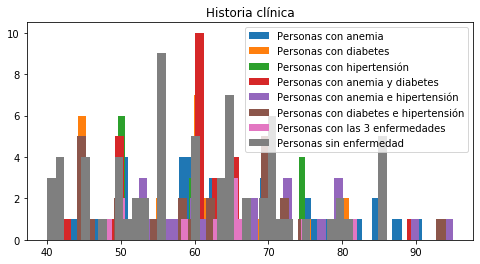

In [4]:
hist_clin(data['Edad'],data['Sexo'],data['Anemia'],data['Diabetes'],data['Hipertensión'])

In [5]:
#Creación Data Frame 'limpio' 

data2 = pd.DataFrame(columns=['Creatinina', 'Plaquetas',
                              'CPK', 'Sodio',
                              'Flujo_Sangre', 'T.obs',
                              'Muerte'])

# Lllenar el Data Frame limpio y acomodarlo

data2['Creatinina'] = data.T.loc['Creatinina']
data2['Plaquetas'] = data.T.loc['Plaquetas']
data2['CPK'] = data.T.loc['CPK']
data2['Sodio'] = data.T.loc['Sodio']
data2['Flujo_Sangre'] = data.T.loc['Flujo_Sangre']
data2['T.obs'] = data.T.loc['T.obs']
data2['Muerte'] = data.T.loc['Muerte']


data2.head(5)

,Creatinina,Plaquetas,CPK,Sodio,Flujo_Sangre,T.obs,Muerte
0,1.9,265000.00,582.0,130.0,20.0,4.0,1.0
1,1.1,263358.03,7861.0,136.0,38.0,6.0,1.0
2,1.3,162000.00,146.0,129.0,20.0,7.0,1.0
3,1.9,210000.00,111.0,137.0,20.0,7.0,1.0
4,2.7,327000.00,160.0,116.0,20.0,8.0,1.0


In [6]:
#Estadísticas de cada uno de los indicadores
tabla = pd.DataFrame({'Media': data2.mean(),
                      'Volatilidad': data2.std()})
tabla

,Media,Volatilidad
Creatinina,1.393880,1.034510
Plaquetas,263358.029264,97804.236869
CPK,581.839465,970.287881
Sodio,136.625418,4.412477
Flujo_Sangre,38.083612,11.834841
T.obs,130.260870,77.614208
Muerte,0.321070,0.467670


# Funciones a utilizar

Para no repetir todo el código en cada uno de los nodos se decidió definir las funciones en principio para eficientar el trabajo.

In [7]:
dist_continua=[d for d in dir(st) if isinstance(getattr(st,d),st.rv_continuous)]
dist_continua

['alpha',
 'anglit',
 'arcsine',
 'argus',
 'beta',
 'betaprime',
 'bradford',
 'burr',
 'burr12',
 'cauchy',
 'chi',
 'chi2',
 'cosine',
 'crystalball',
 'dgamma',
 'dweibull',
 'erlang',
 'expon',
 'exponnorm',
 'exponpow',
 'exponweib',
 'f',
 'fatiguelife',
 'fisk',
 'foldcauchy',
 'foldnorm',
 'frechet_l',
 'frechet_r',
 'gamma',
 'gausshyper',
 'genexpon',
 'genextreme',
 'gengamma',
 'genhalflogistic',
 'genlogistic',
 'gennorm',
 'genpareto',
 'gilbrat',
 'gompertz',
 'gumbel_l',
 'gumbel_r',
 'halfcauchy',
 'halfgennorm',
 'halflogistic',
 'halfnorm',
 'hypsecant',
 'invgamma',
 'invgauss',
 'invweibull',
 'johnsonsb',
 'johnsonsu',
 'kappa3',
 'kappa4',
 'ksone',
 'kstwobign',
 'laplace',
 'levy',
 'levy_l',
 'levy_stable',
 'loggamma',
 'logistic',
 'loglaplace',
 'lognorm',
 'lomax',
 'maxwell',
 'mielke',
 'moyal',
 'nakagami',
 'ncf',
 'nct',
 'ncx2',
 'norm',
 'norminvgauss',
 'pareto',
 'pearson3',
 'powerlaw',
 'powerlognorm',
 'powernorm',
 'rayleigh',
 'rdist',
 'rec

In [8]:
#Declaración Distribuciones a Utilizar 
distribuciones = ['alpha','beta','expon','exponnorm','gamma','lognorm','triang','uniform']

Función para encontrar la distribución que más se adapta a nuestros datos, utilizando las previamente definidas.

In [9]:
def distribucion(distribuciones,datos):
    
    e=[]
    [y,x,_]= plt.hist(datos, bins=30, density=True);
    x=x[1:]
    
    def a(dist):
        param = getattr(st, dist).fit(datos)
        pdf = getattr(st, dist).pdf(x, * param)
        plt.plot(x,pdf, label = dist);
        plt.legend();
        e.append([(abs(y-pdf)/pdf).mean()*100,dist])
    [a(dist) for dist in distribuciones]
     
    return e

Prueba Q-Q, resultado el gráfico para observar la similitud de la distribución con el histograma.

In [10]:
# Histograma de las variables creadas
def QQ(datos,dist):
    fig, ax = plt.subplots(3,1, figsize=(8,10))
    fig.tight_layout(pad=3.0)

    y, x, _ = ax[0].hist(datos, bins = 35, density=True)
    x = x[1:]
    plt.grid()
    ax[0].grid()
    #datos
    params = getattr(st, dist).fit(datos)

    # Graficar PDF de la distribución que queremos probar

    y = getattr(st, dist).pdf(x, *params)
    ax[0].plot(x,y,'r--')
    ax[0].set_ylabel('Probability')

    grap2 = st.probplot(datos,dist=dist, sparams=getattr(st, dist).fit(x)[:-2], plot=ax[1], fit=True)
    ax[1].set_title('Usando paquete scipy')

    grap1 = sm.qqplot(datos, dist=dist, line='s', fit=True, ax=ax[2])
    ax[2].set_title('Usando paquete stats')

    plt.show()

KDE para obtener la mejor distribución.

In [11]:
# Funcion que retorna una funcion de densidad de probabilidad de un conjunto de datos
def kde_statsmodels_mf(x, **kwargs):
    """Multivariate Kernel Density Estimation with Statsmodels"""
    kde = KDEMultivariate(x, 
                          bw='cv_ml',
                          var_type='c', **kwargs)
    f = lambda x_grid: kde.pdf(x_grid)
    return f

Gráfica de la distribución y el histograma con la distribución obtenida con el KDE.

In [12]:
def nueva_fun(datos,x):
    fig, ax = plt.subplots(2,1, figsize=(6,8))
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    
    ax[0].plot(x,f(x));
    ax[0].hist(datos,bins = 35, density = True);
    
    ax[1].plot(0,max_f,'x',lw = 10)
    ax[1].plot(x,f(x));
    
    plt.show()

In [13]:
def acep_rechazo(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 y_ar):
    '''Funcion para hacer el metodo de aceptacion de rechazo '''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(0,max_f)
        R1 = np.random.uniform(0,y_ar,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X

Montecarlo utilizando aceptación-rechazo.

In [14]:
def montecarlo(datos,x,N,y_ar):
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    plt.figure()
    plt.plot(x,f(x))
    plt.hist(acep_rechazo(f,max_f,N,y_ar),bins = 70, density = True);
    plt.show()

Funciones para la reducción de varianza

In [15]:
def prob(datos):
    a= Counter(datos).most_common()
    b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
    historia= [b[i][0] for i in range(len(b))]
    pacientes= [b[i][1] for i in range(len(b))]
    probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
    p_acumulada= np.cumsum(probabilidad)

    df= pd.DataFrame(index=historia,columns=['Pacientes','probabilidad','p_acumulada'],dtype='float')
    df.index.name= 'Historia'

    df['Pacientes']= pacientes
    df['probabilidad']= probabilidad
    df['p_acumulada']= p_acumulada

    return df

In [16]:
def plot_histogram_discrete(distribucion:'distribución a graficar histograma',
                            label:'label del legend'):
    # len(set(distribucion)) cuenta la cantidad de elementos distintos de la variable 'distribucion'
    plt.figure(figsize=[8,4])
    y,x = np.histogram(distribucion,density = True,bins = len(set(distribucion)) - 1) 
    plt.bar(x[1:],y,label=label)
    plt.legend()
    plt.show()

In [17]:
def Gen_distr_discreta(U:'vector de números aleatorios',
                       p_acum: 'P.Acumulada de la distribución a generar',
                       c):
    '''Tener en cuenta que este arreglo cuenta números empezando del 0'''
    v = np.array(list(map(lambda j:sum(c for i in p_acum if i<U[j]),range(len(U)))))
    return v

In [18]:
def estra_igualmente_espaciado(B):
    U2= np.random.rand(B)
    i=np.arange(0,B)
    estra= (U2+i)/B
    return estra

Intervalo de confianza con el vector de salida de la prueba aceptación-rechazo

In [19]:
# Intervalos de confianza y media de los datos
def int_conf(datos):    
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    X = acep_rechazo(f, max_f, 1000 ,y_ar)
    N = 10**5
    confianza = 0.95
    i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    #Reportamos en un Data Frame los resultados Obtenidos

    resumen_c = pd.DataFrame(columns = ['Confianza %2.2f' %(confianza) ],
                            index = ['Intervalo t', 'Intervalo Normal', 'Media'])

    resumen_c['Confianza %2.2f' %(confianza)] = [i1, i2, media]
    print('El error entre la media real y Montecarlo es: ', (abs(np.array(datos).mean()
                                                                - media) / media) * 100, '%')
    return resumen_c

Prueba chi chuadrado utilizando el histograma para comprobar la adaptabilidad.

In [20]:
def chi(datos,y_ar):
    np.random.seed(555)
    mu_real = datos.mean(); sigma_real = datos.std()
    N = 100 # Cantidad de muestras
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    n1 = acep_rechazo(f,max_f,N,y_ar)
    J = 90  # Cantidad de particiones del histograma
    [freq, x, _] = plt.hist(n1, J, density=True)
    plt.show()
    # Se obvia el último valor de x para obtener exactamente J muestras de x
    x = x[:-1] 

    # Media y desviación estándar muestral
    mu = np.mean(x)
    sigma = np.std(x)
    print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

    pi = f(x)
    # Cálculo de la esperanza usando la expresión teórica
    Ei = x*pi
    # Cálculo teórico de la chi cuadrada
    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
    print('Valor de chi cuadrado teorico  = ', x2)

    # Cálculo usando la librería estadística de la chi cuadrada
    X2 = st.chisquare(freq, Ei)
    print('Valor de chi cuadrado librería = ', X2)

    # Cálculo de Grados de libertad del estadístico
    p = 2 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad

    Chi_est = st.chi2.ppf(q=0.95, df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

# CREATININA

Histograma para observar el rango de la x.

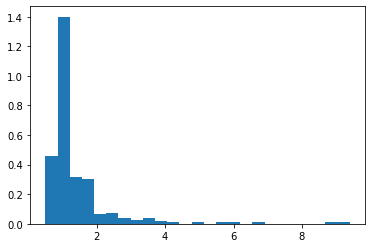

In [21]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Creatinina'], bins = 25, density = True );

In [22]:
datos = data2['Creatinina']
x = np.arange(0,8,.01)
y_ar= 8

C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2381: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


[[186.267412799141, 'alpha'],
 [73964.20264031284, 'beta'],
 [1341.9668559231347, 'expon'],
 [17268.773357633672, 'exponnorm'],
 [85.71496183030547, 'gamma'],
 [911.1338428459584, 'lognorm'],
 [138.18560041350793, 'triang'],
 [143.25529542920845, 'uniform']]

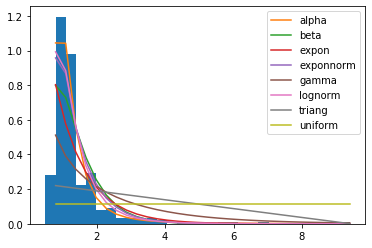

In [23]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **gamma** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

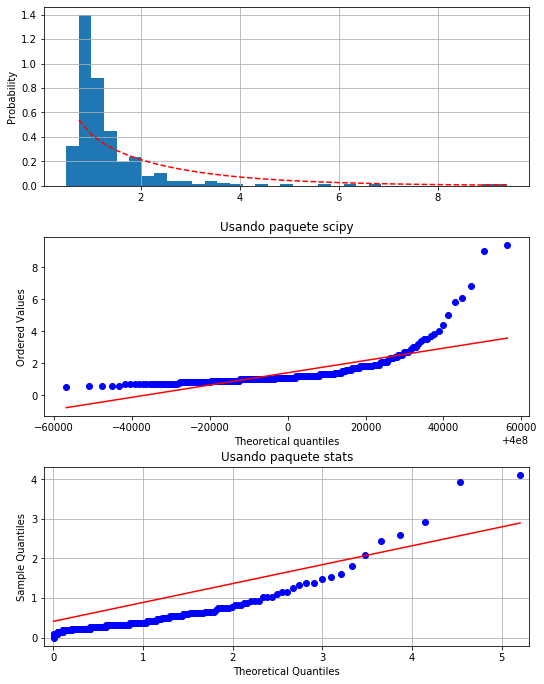

In [24]:
QQ(datos,'gamma')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución gamma no nos sirve para modelar nuestro conjunto de datos

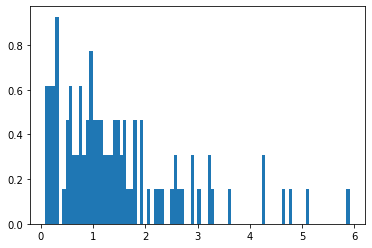

media mu =2.966788, desviación estándar muestral =1.681621


In [25]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.gamma(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [26]:
pi = st.gamma.pdf(x_c, a=0, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2.966788255816566 
Desviación estándar muestral =  1.6816206603888169


C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [27]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
0.50,1,0.003344,0.003344
0.60,4,0.013378,0.016722
0.70,19,0.063545,0.080268
0.75,1,0.003344,0.083612
0.80,24,0.080268,0.163880
0.90,32,0.107023,0.270903
1.00,50,0.167224,0.438127
1.10,32,0.107023,0.545151
1.18,11,0.036789,0.581940


In [28]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)
c=(max(historia)-min(historia))/len(historia)

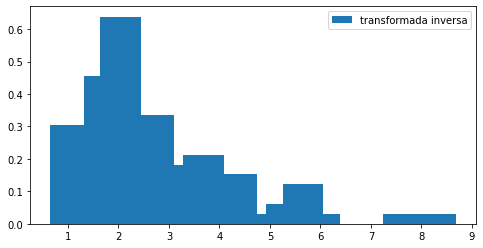

In [29]:
np.random.seed(55)
N = 100

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [30]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(1.3938795986622072, 1.0327786652795918)

In [31]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 2.0636875000000003
Desv. Est. Montecarlo = 1.6650282455843661


In [32]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 2.6438879598662215
Desv. Est. Estratificado = 1.61748528601978


In [33]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 2.6915133779264218


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

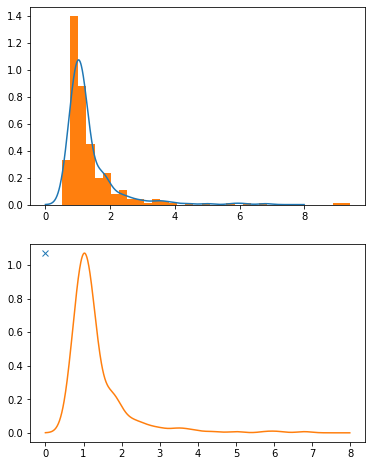

In [34]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

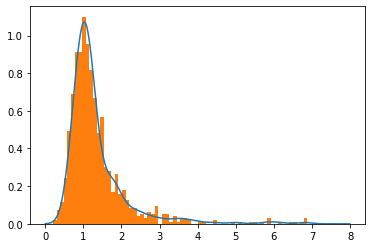

In [35]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

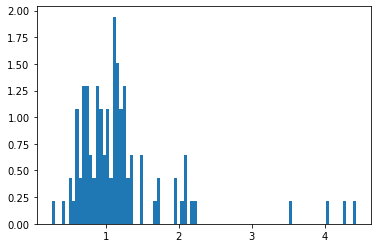

media mu =2.321147, desviación estándar muestral =1.203631
Valor de chi cuadrado teorico  =  32.159920023159835
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=32.159920023159835, pvalue=0.9999999957048532)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2.321146717814644 
Desviación estándar muestral =  1.2036312441419834


In [36]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [37]:
int_conf(datos)

El error entre la media real y Montecarlo es:  6.663307590836863 %


,Confianza 0.95
Intervalo t,"(1.260041358106551, 1.3535651953469843)"
Intervalo Normal,"(1.2600980125518573, 1.353508540901678)"
Media,1.3068


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $6.32\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución gamma que era de $85\%$ aprox.

# PLAQUETAS

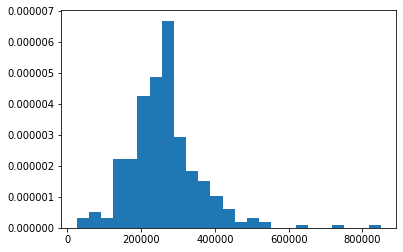

In [38]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Plaquetas'], bins = 25, density = True );

In [39]:
datos = data2['Plaquetas']
x = np.arange(0,8e5,100)
y_ar=8e5

C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in true_divide
  if sys.path[0] == '':
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in true_divide
  if sys.path[0] == '':


[[804.1493522386074, 'alpha'],
 [3553.160379826424, 'beta'],
 [89.93208470714806, 'expon'],
 [362.70630570555727, 'exponnorm'],
 [nan, 'gamma'],
 [1459.4519074628113, 'lognorm'],
 [99.17740081606806, 'triang'],
 [109.92196209587514, 'uniform']]

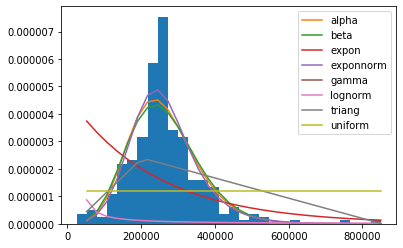

In [40]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **exponencial** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

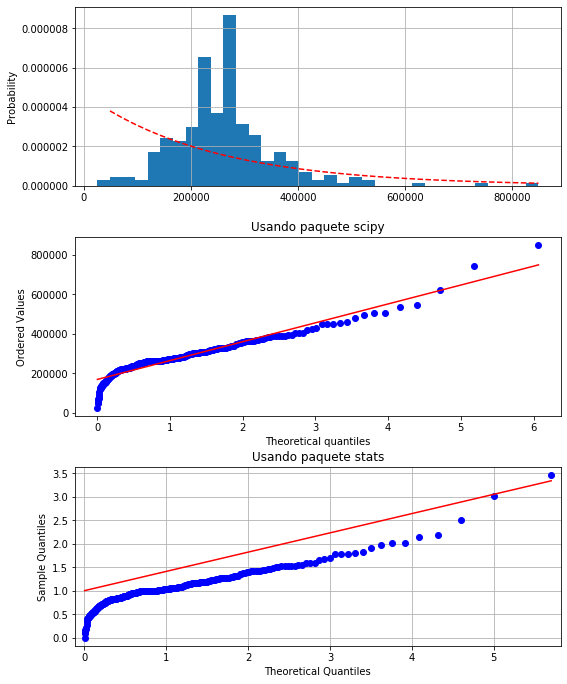

In [41]:
QQ(datos,'expon')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución exponencial no nos sirve para modelar nuestro conjunto de datos

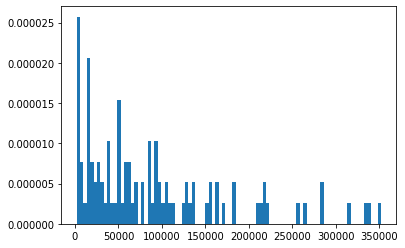

media mu =175002.764846, desviación estándar muestral =101007.980688


In [42]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.exponential(sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [43]:
pi = st.expon.pdf(x_c, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  175002.76484565416 
Desviación estándar muestral =  101007.98068755063


C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\stats.py:5048: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


In [44]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
25100.0,1,0.003344,0.003344
47000.0,1,0.003344,0.006689
51000.0,1,0.003344,0.010033
62000.0,1,0.003344,0.013378
70000.0,1,0.003344,0.016722
...,...,...,...
533000.0,1,0.003344,0.986622
543000.0,1,0.003344,0.989967
621000.0,1,0.003344,0.993311


In [45]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)
c=(max(historia)-min(historia))/len(historia)

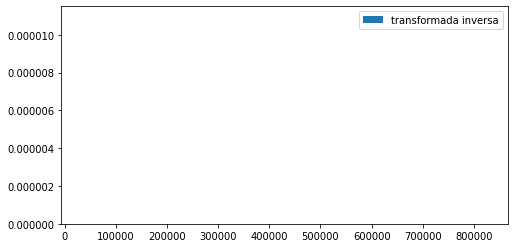

In [46]:
np.random.seed(55)
N = 176

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [47]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(263358.02926421404, 97640.54765451424)

In [48]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)+ min(historia)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 423009.85924586764
Desv. Est. Montecarlo = 209149.97872530925


In [49]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 426373.4702797201
Desv. Est. Estratificado = 210968.6636223788


In [50]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 426075.6384919428


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

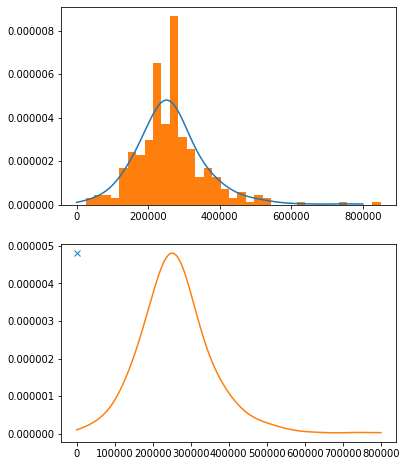

In [51]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

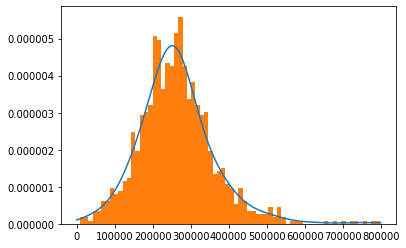

In [52]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

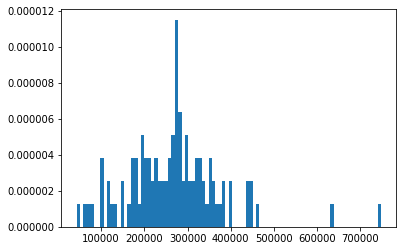

media mu =391655.331075, desviación estándar muestral =203314.215202
Valor de chi cuadrado teorico  =  33.115712069169234
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=33.115712069169234, pvalue=0.9999999900390245)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  391655.331075365 
Desviación estándar muestral =  203314.21520195727


In [53]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [54]:
int_conf(datos)

El error entre la media real y Montecarlo es:  1.3803551368404454 %


,Confianza 0.95
Intervalo t,"(253603.6193386365, 265940.88000493066)"
Intervalo Normal,"(253611.09294836287, 265933.4063952043)"
Media,259772


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $.71\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución exponencial que era de $89\%$ aprox.

# CPK

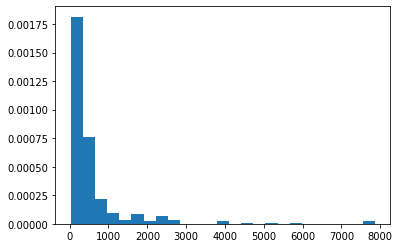

In [55]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['CPK'], bins = 25, density = True );

In [56]:
datos = data2['CPK']
x = np.arange(0,8000,10)
y_ar=8000

[[190.4128535982531, 'alpha'],
 [20596.220743832426, 'beta'],
 [60475.73518744906, 'expon'],
 [83742.77715973345, 'exponnorm'],
 [984.2769845441449, 'gamma'],
 [195.85198846509854, 'lognorm'],
 [186.32616631898313, 'triang'],
 [150.59085841694537, 'uniform']]

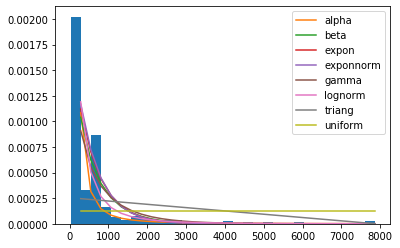

In [57]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **uniforme** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

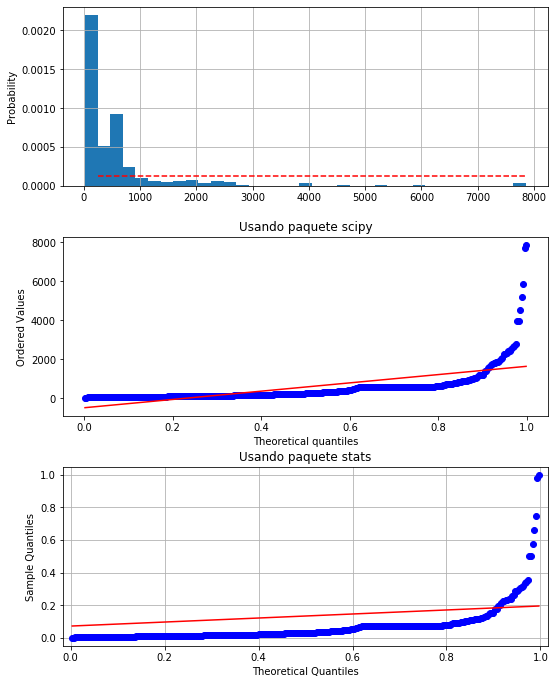

In [58]:
QQ(datos,'uniform')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución uniforme no nos sirve para modelar nuestro conjunto de datos

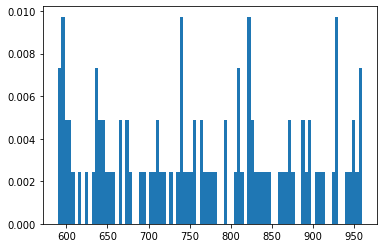

media mu =772.593224, desviación estándar muestral =106.806040


In [59]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.uniform(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [60]:
pi = st.uniform.pdf(x_c, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  772.5932235798564 
Desviación estándar muestral =  106.80604019149823


C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\luill\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in double_scalars
  """


In [61]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
23.0,1,0.003344,0.003344
30.0,1,0.003344,0.006689
47.0,3,0.010033,0.016722
52.0,1,0.003344,0.020067
53.0,1,0.003344,0.023411
...,...,...,...
4540.0,1,0.003344,0.986622
5209.0,1,0.003344,0.989967
5882.0,1,0.003344,0.993311


In [62]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)
c=(max(historia)-min(historia))/len(historia)

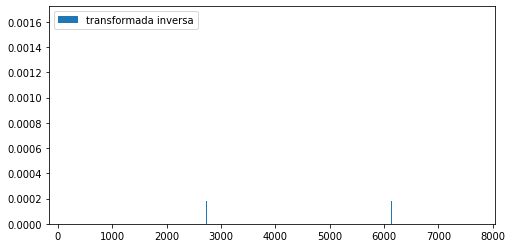

In [63]:
np.random.seed(55)
N = 100

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [64]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(581.8394648829432, 968.6639668032415)

In [65]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)+ min(historia)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 3725.5056860207146
Desv. Est. Montecarlo = 2186.7726329388706


In [66]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 3824.1628183689263
Desv. Est. Estratificado = 2215.267087017877


In [67]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 3824.918992796506


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

C:\Users\luill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: invalid value encountered in log
  L += func(f_i)


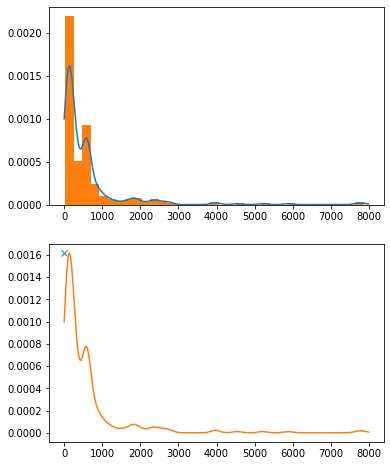

In [68]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

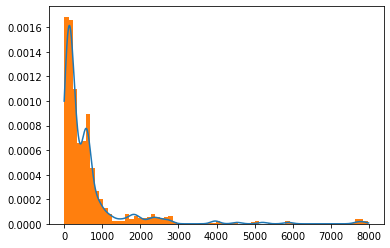

In [69]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

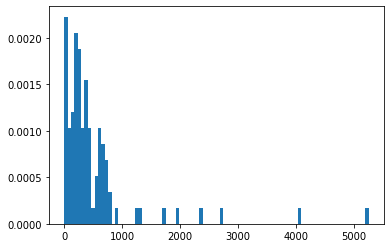

media mu =2596.076011, desviación estándar muestral =1515.520245
Valor de chi cuadrado teorico  =  8.707490433357025
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=8.707490433357025, pvalue=1.0)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  2596.0760111772056 
Desviación estándar muestral =  1515.5202453599222


In [70]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $1$, por lo tanto aceptamos nuestra $H_0$.

In [71]:
int_conf(datos)

El error entre la media real y Montecarlo es:  5.924265164563908 %


,Confianza 0.95
Intervalo t,"(564.7696884541413, 672.190014067955)"
Intervalo Normal,"(564.8347610510516, 672.1249414710446)"
Media,618.48


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $4.03\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución uiforme que era de $150\%$ aprox.

# SODIO

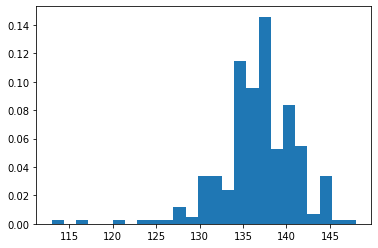

In [72]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Sodio'], bins = 25, density = True );

In [73]:
datos = data2['Sodio']
x = np.arange(100,150,1)
y_ar=150

C:\Users\luill\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1415: RuntimeWarning: divide by zero encountered in log
  return exparg + np.log(0.5 * invK * sc.erfc(-(x - invK) / np.sqrt(2)))


[[248742.9316908977, 'alpha'],
 [581.2419030288643, 'beta'],
 [188.22943632974278, 'expon'],
 [50232.11617888709, 'exponnorm'],
 [217402.9009955755, 'gamma'],
 [68516.60785515315, 'lognorm'],
 [75.7567025840233, 'triang'],
 [109.23076923076931, 'uniform']]

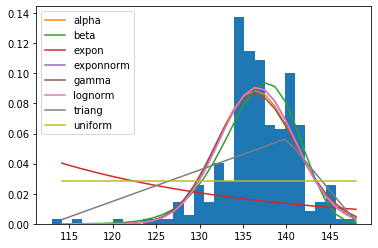

In [74]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **triangular** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

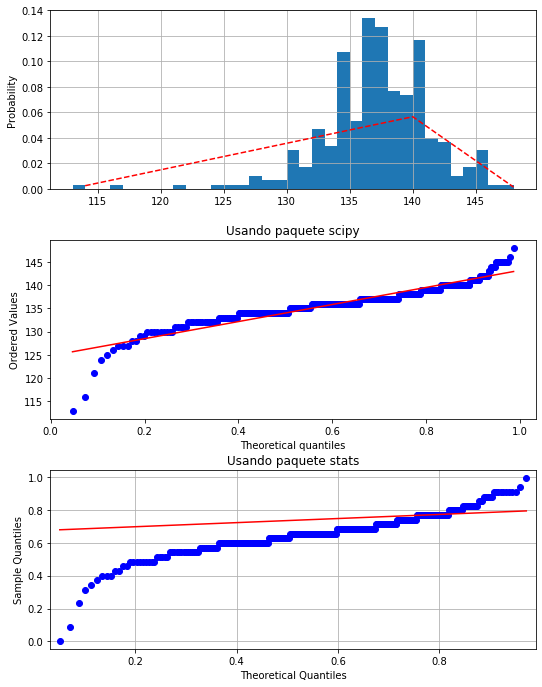

In [75]:
QQ(datos,'triang')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución uniforme no nos sirve para modelar nuestro conjunto de datos

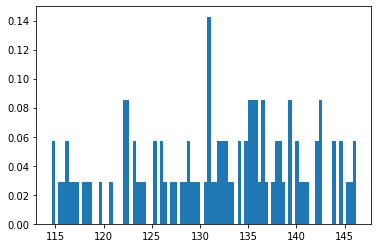

media mu =130.224134, desviación estándar muestral =9.106352


In [76]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.triangular(left=110, mode=mu_real ,right=150, size=N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [77]:
a,b= 110,150
pi = st.triang.pdf(x_c, c= mu,loc=a,scale=(b-a))
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  130.22413379221337 
Desviación estándar muestral =  9.106351835289669


In [78]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
113.0,1,0.003344,0.003344
116.0,1,0.003344,0.006689
121.0,1,0.003344,0.010033
124.0,1,0.003344,0.013378
125.0,1,0.003344,0.016722
126.0,1,0.003344,0.020067
127.0,3,0.010033,0.030100
128.0,2,0.006689,0.036789
129.0,2,0.006689,0.043478


In [79]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
c=1
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)

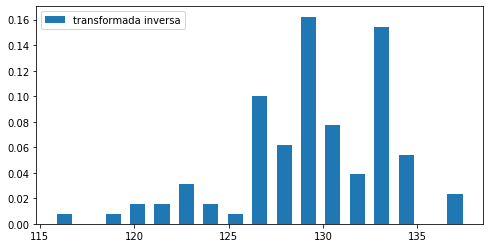

In [80]:
np.random.seed(55)
N = 100

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [81]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(136.62541806020067, 4.405092379513557)

In [82]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)+ min(historia)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 128.96296296296296
Desv. Est. Montecarlo = 3.605361044040876


In [83]:
u1

array([0.28190432, 0.57645551, 0.49099905, 0.75501585, 0.0681833 ,
       0.92742615, 0.28698023, 0.54877215, 0.52754089, 0.49230762,
       0.95204407, 0.60966309, 0.416666  , 0.43763738, 0.23588382,
       0.98058256, 0.75344167, 0.29131965, 0.29163384, 0.72441649,
       0.50440262, 0.0402351 , 0.51020636, 0.3759133 , 0.75139784,
       0.72017911, 0.07646552])

In [84]:
f_u1

array([127., 129., 129., 132., 122., 134., 127., 129., 129., 129., 136.,
       130., 128., 128., 126., 137., 132., 127., 127., 131., 129., 121.,
       129., 128., 132., 131., 123.])

In [85]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 128.67558528428094
Desv. Est. Estratificado = 4.168496184884363


In [86]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 128.63879598662209


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

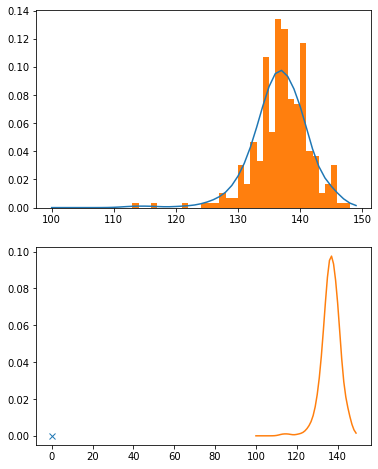

In [87]:
nueva_fun(datos,x)

In [88]:
def acep_rechazo_s(f:'función objetivo a generar',
                 max_f:'maximo de la funcion',
                 N: 'numero de variables aleatorias distribuidas a generar',
                 y_ar):
    '''Funcion para hacer el metodo de aceptacion de rechazo '''
    X = np.zeros(N)
    i = 0 
    
    while i < N:
        R2 = np.random.uniform(100,max_f)
        R1 = np.random.uniform(100,y_ar,1)
        if R2 < f(R1):
            X[i] = R1
            i+=1
    return X
def montecarlo_s(datos,x,N,y_ar):
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    plt.figure()
    plt.plot(x,f(x))
    plt.hist(acep_rechazo_s(f,max_f,N,y_ar),bins = 70, density = True);
    plt.show()

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa. En esta parte se modificó la función para cambiar el intervalo, si consideramos desde 0 la simulación nos da un error.

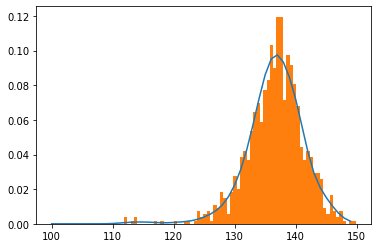

In [89]:
montecarlo_s(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

In [90]:
def chi_s(datos,y_ar):
    np.random.seed(555)
    mu_real = datos.mean(); sigma_real = datos.std()
    N = 100 # Cantidad de muestras
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    n1 = acep_rechazo_s(f,max_f,N,y_ar)
    J = 90  # Cantidad de particiones del histograma
    [freq, x, _] = plt.hist(n1, J, density=True)
    plt.show()
    # Se obvia el último valor de x para obtener exactamente J muestras de x
    x = x[:-1] 

    # Media y desviación estándar muestral
    mu = np.mean(x)
    sigma = np.std(x)
    print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

    pi = f(x)
    # Cálculo de la esperanza usando la expresión teórica
    Ei = x*pi
    # Cálculo teórico de la chi cuadrada
    x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
    print('Valor de chi cuadrado teorico  = ', x2)

    # Cálculo usando la librería estadística de la chi cuadrada
    X2 = st.chisquare(freq, Ei)
    print('Valor de chi cuadrado librería = ', X2)

    # Cálculo de Grados de libertad del estadístico
    p = 2 # Parámetros estimados con los datos
    m = J-p-1 # grados de libertad

    Chi_est = st.chi2.ppf(q=0.95, df=m)
    print('Estadístico de chi_cuadrado = ', Chi_est)
    print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

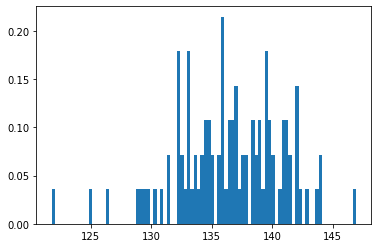

media mu =134.213485, desviación estándar muestral =7.257242
Valor de chi cuadrado teorico  =  472.9009712396043
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=472.9009712396043, pvalue=1.134259052199385e-53)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  134.21348492907714 
Desviación estándar muestral =  7.257241784891904


In [91]:
chi_s(datos,y_ar)

Esta situación está bastante extraña, ya que obtenemos un *p-value* menor a $.05$, por lo tanto la teoría nos dice que debemos rechazar la $H_0$.

In [92]:
# Intervalos de confianza y media de los datos
def int_conf_s(datos):    
    f = kde_statsmodels_mf(datos)
    max_f = f(optimize.fmin(lambda x:-f(x),0,disp=False))
    X = acep_rechazo_s(f, max_f, 1000 ,y_ar)
    N = 10**5
    confianza = 0.95
    i1 = st.t.interval(confianza,len(X)-1, loc=np.mean(X), scale=st.sem(X))
    i2 = st.norm.interval(confianza, loc=np.mean(X), scale=st.sem(X))
    media = np.mean(X)
    #Reportamos en un Data Frame los resultados Obtenidos

    resumen_c = pd.DataFrame(columns = ['Confianza %2.2f' %(confianza) ],
                            index = ['Intervalo t', 'Intervalo Normal', 'Media'])

    resumen_c['Confianza %2.2f' %(confianza)] = [i1, i2, media]
    print('El error entre la media real y Montecarlo es: ', (abs(np.array(datos).mean()
                                                                - media) / media) * 100, '%')
    return resumen_c
int_conf_s(datos)

El error entre la media real y Montecarlo es:  0.10538270427839737 %


,Confianza 0.95
Intervalo t,"(136.1731145937684, 136.79006554571765)"
Intervalo Normal,"(136.17348832751364, 136.7896918119724)"
Media,136.482


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $.06\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución triangular que era de $75\%$ aprox.

# FLUJO DE SANGRE

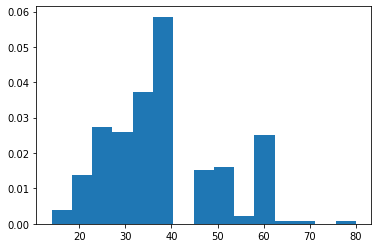

In [93]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['Flujo_Sangre'], bins = 15, density = True );

In [94]:
datos = data2['Flujo_Sangre']
x = np.arange(0,80,1)
y_ar=80

[[108.96426956118532, 'alpha'],
 [114.9211838122965, 'beta'],
 [140.34272428543795, 'expon'],
 [108.75971096620323, 'exponnorm'],
 [108.7983546177608, 'gamma'],
 [108.72220527195987, 'lognorm'],
 [118.62095137269748, 'triang'],
 [131.30434782608685, 'uniform']]

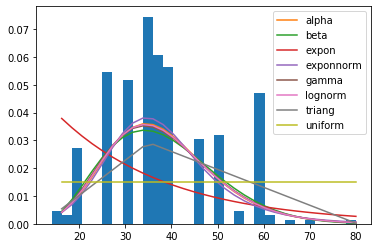

In [95]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **gamma** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

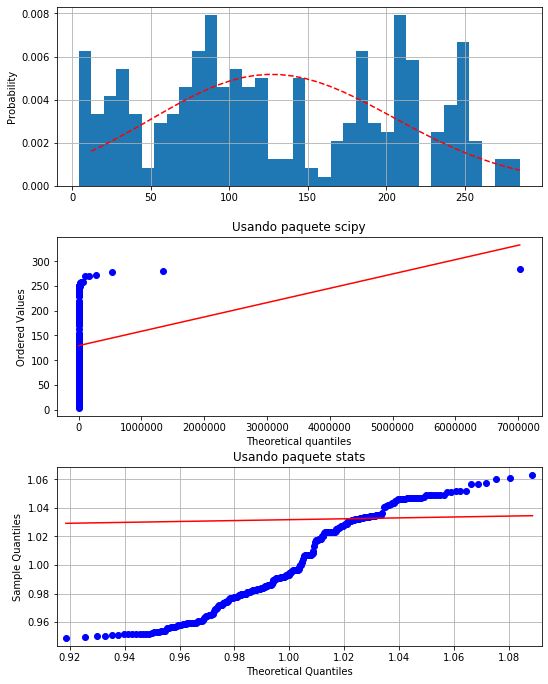

In [127]:
QQ(datos,'lognorm')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución gamma no nos sirve para modelar nuestro conjunto de datos

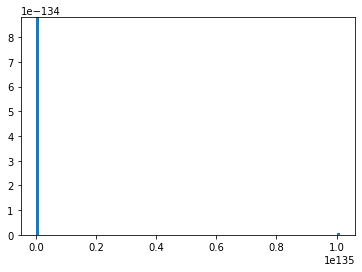

media mu =500389252868222226401430408385464615911211763120780571391962180387867871076887626417069405643818596407700239942835709881470896708780032.000000, desviación estándar muestral =292127901539986122062667529395762264572077681147743763904365323273345485617519724834831639863891944308831428250615073314267475474382848.000000


In [129]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.lognormal(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [132]:
pi = st.lognorm.pdf(x_c, s=0, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  5.003892528682222e+134 
Desviación estándar muestral =  2.9212790153998612e+134


In [99]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
14.0,1,0.003344,0.003344
15.0,2,0.006689,0.010033
17.0,2,0.006689,0.016722
20.0,18,0.060201,0.076923
25.0,36,0.120401,0.197324
30.0,34,0.113712,0.311037
35.0,49,0.163880,0.474916
38.0,40,0.133779,0.608696
40.0,37,0.123746,0.732441


In [100]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)
c=(max(historia)-min(historia))/len(historia)

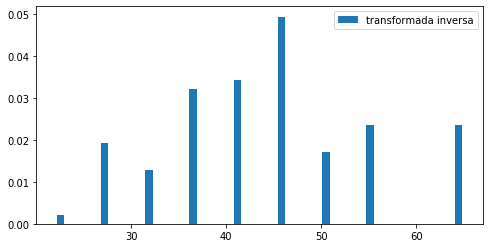

In [101]:
np.random.seed(55)
N = 100

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [102]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(38.08361204013379, 11.815033462318585)

In [103]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 29.003460207612456
Desv. Est. Montecarlo = 9.886234008624788


In [104]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 41.397206374188464
Desv. Est. Estratificado = 10.911951859293179


In [105]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 41.319299626204995


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

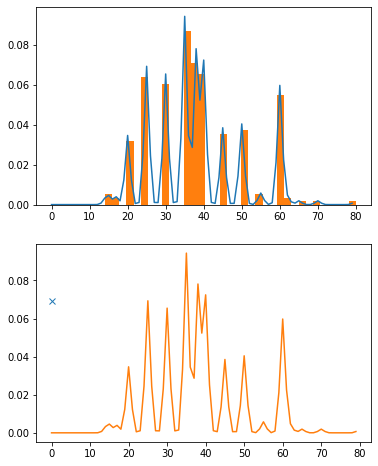

In [106]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

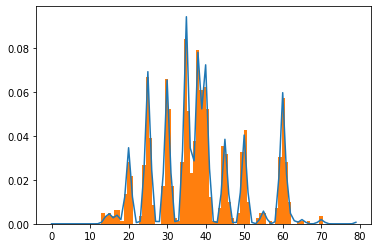

In [107]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

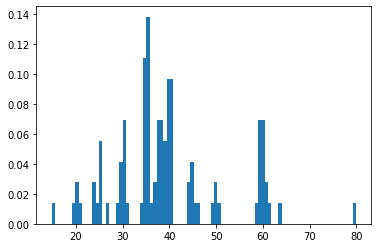

media mu =47.009742, desviación estándar muestral =18.806939
Valor de chi cuadrado teorico  =  49.563091769371
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=49.563091769371, pvalue=0.9997728315941117)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  47.00974235561407 
Desviación estándar muestral =  18.80693886993593


In [108]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [109]:
int_conf(datos)

El error entre la media real y Montecarlo es:  0.356369127919989 %


,Confianza 0.95
Intervalo t,"(37.21823288567866, 38.67851860318842)"
Intervalo Normal,"(37.219117490927495, 38.67763399793959)"
Media,37.9484


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $6.32\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución gamma que era de $85\%$ aprox.

In [ ]:
np.random.seed(5555)
N = 100
Z = np.random.normal(size=N)
x1 = np.random.normal(10, 5, N)
x2 = np.random.normal(30, 8, N)

# Comando que estima el valor del coeficiente de correlación de pearson 
corr = st.pearsonr(x1 + 50 * Z, x2 + 50 * Z)
corr2 = st.pearsonr(x1, x2)

Rxy = corr[0]
print('Rxy  = ',corr[0],', p-value  = ', corr[1])
print('Rxy2 = ',corr2[0],',p-value2 = ', corr2[1])

# Cálculo del p-value 
T = Rxy * np.sqrt((N - 2) / (1 - Rxy**2))
p_val = st.t.pdf(T, df=N-2)
print(p_val)

In [ ]:
x = np.arange(-10,60,.1)
y1 = st.norm.pdf(x,10,5)
y2 = st.norm.pdf(x,30,8)
plt.plot(x,y1,x,y2);

# TIEMPO DE OBSERVACIÓN

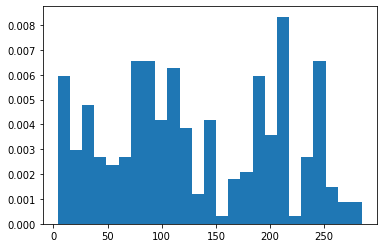

In [110]:
#Graficar histograma de los datos de nuestra variable
plt.hist(data2['T.obs'], bins = 25, density = True );

In [136]:
datos = data2['T.obs']
x = np.arange(0,300,1)
y_ar=300

[[299.7190444521425, 'alpha'],
 [47.81266519601782, 'beta'],
 [90.04757859720083, 'expon'],
 [65.16177914613469, 'exponnorm'],
 [66.00817684226014, 'gamma'],
 [65.55678180619769, 'lognorm'],
 [61.70083533141231, 'triang'],
 [50.47937569676696, 'uniform']]

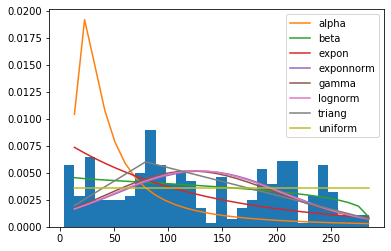

In [137]:
distribucion(distribuciones,datos)

Observamos que la distribución que mejor se ajusta a nuestros datos es la **gamma** pues tiene un menor error.

A continuación se realiza la prueba Q-Q para observar si los cuantiles de los datos reales se ajustan a los de la distribución gamma.

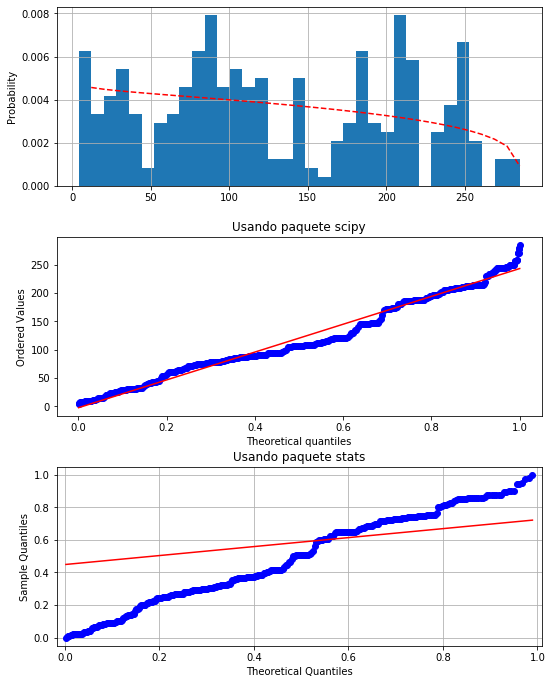

In [138]:
QQ(datos,'beta')

Y bueno, con ambas paqueterías se muestra un desajuste por lo que llegamos a la conclusión que la distribución gamma no nos sirve para modelar nuestro conjunto de datos

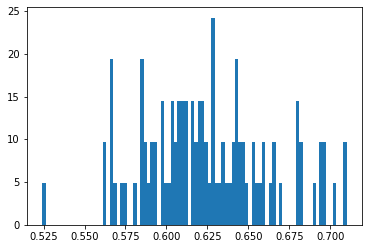

media mu =0.616023, desviación estándar muestral =0.053642


In [139]:
np.random.seed(555)
mu_real = datos.mean(); sigma_real = datos.std()
N = 100 # Cantidad de muestras
n1 = np.random.beta(mu_real, sigma_real, N)
J = 90  # Cantidad de particiones del histograma
[freq, x_c, _] = plt.hist(n1, J, density=True)
plt.show()
# Se obvia el último valor de x para obtener exactamente J muestras de x
x_c = x_c[:-1] 

# Media y desviación estándar muestral
mu = np.mean(x_c)
sigma = np.std(x_c)
print('media mu =%f, desviación estándar muestral =%f'%(mu,sigma))

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es gamma con "media= $\mu$" y "desviación estándar = $\sigma$"

> $H_a$: los datos no se distribuyen normales

Únicamente para comprobar realizamos la prueba de $X^2$, obteniendo un *p-value* de $0$, por la tanto confirmamos que la distribución no nos sirve.

In [140]:
pi = st.beta.pdf(x_c, a=0,b=0, loc=mu, scale=sigma)
# Cálculo de la esperanza usando la expresión teórica
Ei = x_c*pi
# Cálculo teórico de la chi cuadrada
x2 = np.sum(list(map(lambda Ei, obs_i:(obs_i - Ei)**2 / Ei, Ei, freq)))
print('Valor de chi cuadrado teorico  = ', x2)

# Cálculo usando la librería estadística de la chi cuadrada
X2 = st.chisquare(freq, Ei)
print('Valor de chi cuadrado librería = ', X2)

# Cálculo de Grados de libertad del estadístico
p = 2 # Parámetros estimados con los datos
m = J-p-1 # grados de libertad

Chi_est = st.chi2.ppf(q=0.95, df=m)
print('Estadístico de chi_cuadrado = ', Chi_est)
print('Media muestral = ', mu, '\nDesviación estándar muestral = ', sigma)

Valor de chi cuadrado teorico  =  nan
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=nan, pvalue=nan)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  0.6160227213159871 
Desviación estándar muestral =  0.05364234320973627


In [141]:
prob(datos)

,Pacientes,probabilidad,p_acumulada
Historia,,,
4.0,1,0.003344,0.003344
6.0,1,0.003344,0.006689
7.0,2,0.006689,0.013378
8.0,2,0.006689,0.020067
10.0,6,0.020067,0.040134
...,...,...,...
270.0,2,0.006689,0.986622
271.0,1,0.003344,0.989967
278.0,1,0.003344,0.993311


In [142]:
a= Counter(datos).most_common()
b=sorted([(a[i][0],a[i][1]) for i in range(len(Counter(datos)))])
historia= [b[i][0] for i in range(len(b))]
pacientes= [b[i][1] for i in range(len(b))]
probabilidad= [pacientes[i]/sum(pacientes) for i in range(len(historia))]
p_acumulada= np.cumsum(probabilidad)
c=(max(historia)-min(historia))/len(historia)

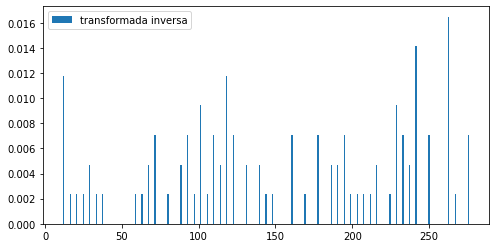

In [143]:
np.random.seed(55)
N = 100

u=np.random.rand(N)
m1= Gen_distr_discreta(u,p_acumulada,c)+min(historia)

plot_histogram_discrete(m1,'transformada inversa')

In [144]:
media=np.sum([historia[i]*probabilidad[i] for i in range(len(historia))])
sigma=np.sqrt(np.sum([probabilidad[i]*(historia[i] - media)**2 for i in range(len(historia))]))
media,sigma

(130.26086956521738, 77.48430960326975)

In [145]:
# Usar montecarlo crudo para estimar la media
N=len(historia)
u1=np.random.rand(N)
f_u1= Gen_distr_discreta(u1,p_acumulada,c)

print('Media Montecarlo =',np.mean(f_u1))
print('Desv. Est. Montecarlo =',np.std(f_u1))

Media Montecarlo = 136.43329985390778
Desv. Est. Montecarlo = 76.34675082166395


In [146]:
f_u2= lambda u: Gen_distr_discreta(u,p_acumulada,c)+ min(historia)
N=len(datos)
U=estra_igualmente_espaciado(N)
m3 = f_u2(U)                                   

print('Media Estratificado =',np.mean(m3))
print('Desv. Est. Estratificado =',np.std(m3))

Media Estratificado = 149.24979661936163
Desv. Est. Estratificado = 79.98031635120614


In [147]:
u = np.random.rand(N)
u2 = 1-u
f_rand = f_u2(u).mean()              
f_comple = f_u2(u2).mean()

var= (f_rand+f_comple)/2
print('Media Complementario =',var)

Media Complementario = 149.1799466690769


Con el KDE obtenemos la función que mejor se adapta para modelar nuestro conjunto de datos.

C:\Users\luill\Anaconda3\lib\site-packages\statsmodels\nonparametric\kernel_density.py:161: RuntimeWarning: divide by zero encountered in log
  L += func(f_i)


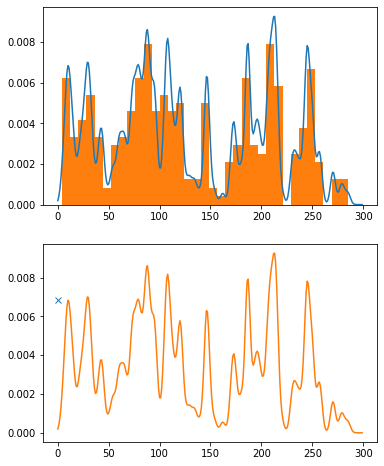

In [123]:
nueva_fun(datos,x)

Y aplicamos entonces montecarlo con el método de aceptación-rechazo, pues como ya sabemos en distribuciones continuas no es factible utilizar transformada inversa.

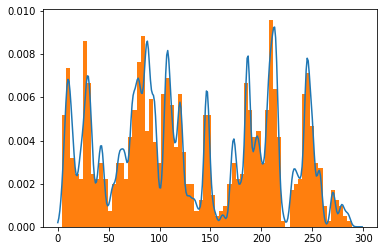

In [124]:
montecarlo(datos,x,1000,y_ar)

### Se desea resolver la siguiente prueba de hipótesis
> $H_0$: la distribución es la encontrada con el KDE

> $H_a$: los datos no se distribuyen con f_KDE

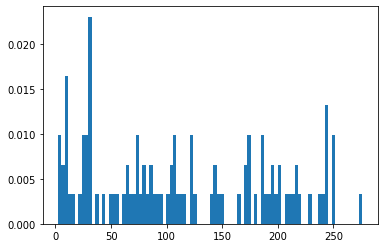

media mu =137.589929, desviación estándar muestral =79.019463
Valor de chi cuadrado teorico  =  41.29461880307187
Valor de chi cuadrado librería =  Power_divergenceResult(statistic=41.29461880307187, pvalue=0.9999964421549178)
Estadístico de chi_cuadrado =  109.77330935028795
Media muestral =  137.58992941753903 
Desviación estándar muestral =  79.01946308487047


In [125]:
chi(datos,y_ar)

Volvemos a realizar la prueba de $X^2$ ahora con la función del KDE, y obtenemos un *p-value* de $.99$, por lo tanto aceptamos nuestra $H_0$.

In [126]:
int_conf(datos)

El error entre la media real y Montecarlo es:  0.9079105940266483 %


,Confianza 0.95
Intervalo t,"(124.19324864370566, 133.9844676490908)"
Intervalo Normal,"(124.19917992387965, 133.9785363689168)"
Media,129.089


Únicamente como pruebas de bondad y ajuste sacamos intervalos de confianza, con una confianza de $.95$ que es la que hemos venido manejando. Obtenemos también un error de la media real con la estimada de $6.32\%$, el cual consideramos aceptable, comparándolo que el menor de la distribución gamma que era de $85\%$ aprox.